In [1]:
"""
All India Consumer Price Index (Rural /Urban)
"""
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data/All_India_Index_March2015_r1.csv')

In [4]:
def get_products(product, year, month=None):
    """
    Function returns a new DataFrame for the mentioned product for a particular year.
    """
    table_cols = [col for col in df.columns if product in col]
    if year and product and month:
        return (df[df['Year']==year][df['Month']==month][['Sector', 'Year', 'Month'] + table_cols].copy(), table_cols)
    elif year and product:
        return (df[df['Year']==year][['Sector', 'Year', 'Month'] + table_cols].copy(), table_cols)
    else:
        raise TypeError

In [5]:
def make_plot(product, year, month=None, plot_kind='bar'):
    """
    This function will plot the mentioned commodity for a particular year.
    """
    if year and product and month:
        df1, table_cols = get_products(product, year, month)
        df1.plot(['Sector','Month'], table_cols ,kind=plot_kind)
    elif year and product:
        df1, table_cols = get_products(product, year)
        df1.plot(['Sector','Month'], table_cols ,kind=plot_kind)
    else:
        raise TypeError

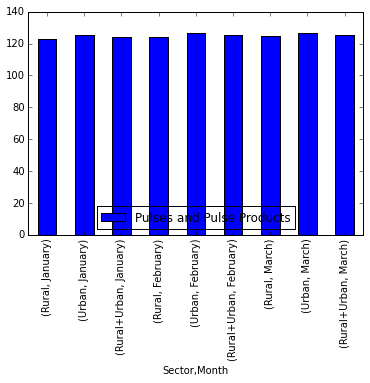

In [6]:
"""
Consumer price index for Pulses in March 2015.
"""
make_plot('Pulses', 2015)

In [7]:
"""
Comparision between commodity of different year and month.
"""
def compare_commodity(product, year_one, year_two, month=None):
    if product and year_one and year_two and month:
        df_one, a = get_products(product, year_one, month)
        df_two, b = get_products(product, year_two, month)
    elif product and year_one and year_two:
        df_one, a = get_products(product, year_one)
        df_two, b = get_products(product, year_two)
    else:
        raise TypeError
    
    #pd.DataFrame({'first':year_2011[a], 'second':year_2013[b]})
    new_df = df_one[['Sector', 'Month']].copy()
    new_index =  [int(x) for x in new_df.index]
    new_df[year_one] = df_one[a]
    x=df_two[b]
    x.index = new_index[:len(x)]
    new_df[year_two] = x
    return new_df.plot(['Sector', 'Month'], kind='bar')

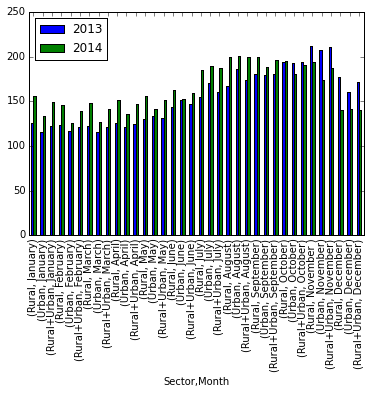

In [8]:
"""
Comparision of Vegetables commodity price index of year 2013 and 2014
"""
compare_commodity('Vegetables', 2013,2014)